The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Number of modules: 5
Number of rooms:   25
Diameter of rooms: 5
Total Number 
of cells:          62500
Number of cells 
per room:          2500
Distance between
cells:             0

(25, 2500, 5, 2)


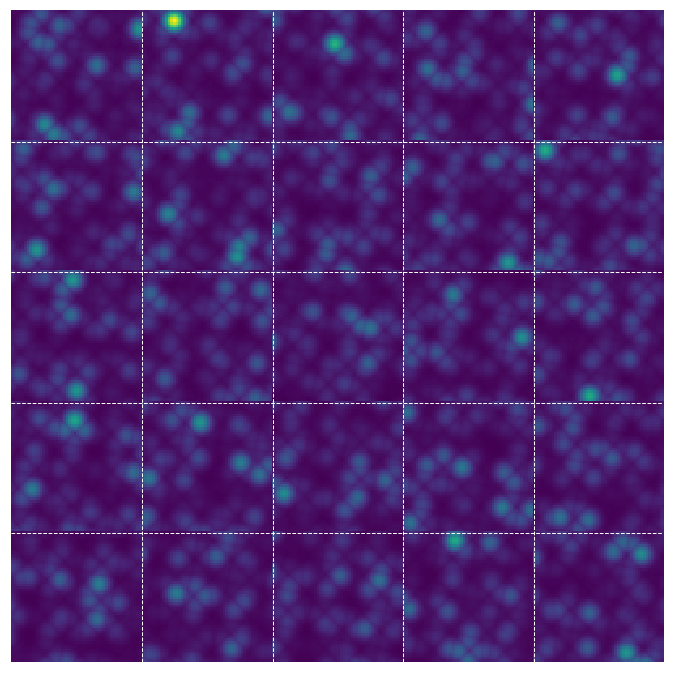

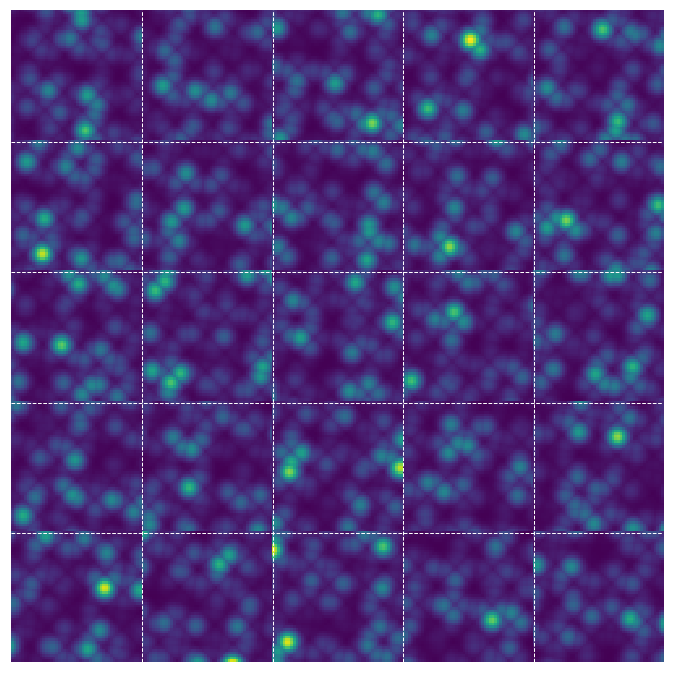

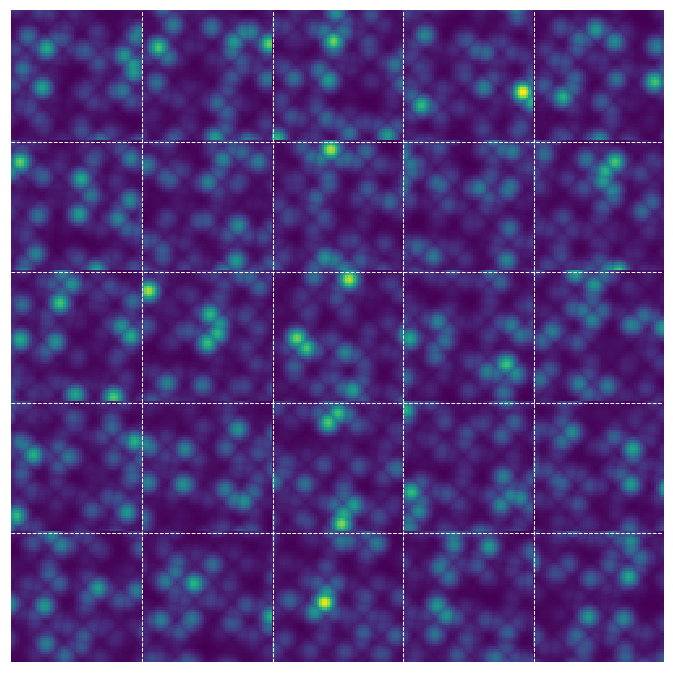

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import i0
from htmresearch.support.gridcells.gridunions.hypermodule import *
from htmresearch.support.gridcells.gridunions.utils import *
%load_ext autoreload
%autoreload 2


m    = 5
nr   = 5**2
nc_  = 50
nc   = nc_**2
diam = 5

summary = """
Number of modules: {}
Number of rooms:   {}
Diameter of rooms: {}
Total Number 
of cells:          {}
Number of cells 
per room:          {}
Distance between
cells:             {}
"""

print summary.format(m, nr, diam, nc*nr, nc, diam/nc_)


S = np.sqrt(2)**np.arange(m)
# S = np.random.normal(3.,1.5,size=m)
# S = np.ones(m)*2.
M = create_2d_hyper_module(m, scale=S)

A = create_action_tensor(M)
PC  = create_atlas(nr, nc_, diam)

Anchors = np.random.sample((nr,m,2))
# Anchors = np.zeros((nr,m,2))

Phi = create_phase_atlas(PC, Anchors, A) 


print Phi.shape

i_r = 2
i_m = 0


def place_code(phi, pinned_phases):
    nr, nc, m, _ = pinned_phases.shape
    mu, kappa = 0.0, 12.
    x = phase_dist(phi.reshape((1,m,2)), pinned_phases.reshape((-1,m,2)))
#     x = smoothstep(1*x)
    z = np.exp(-x**2/.3)
#     z = - x
#     z = 1 - x
#     z = np.exp(kappa*np.cos(x-mu))/(2*np.pi*i0(kappa))
    return z.reshape((nr,nc))


def J(phi, z, pinnded_phases):
    z_ = place_code(phi, pinnded_phases)
    return np.sqrt( np.sum( (z - z_)**2 ) )



def display(z):
    nr, nc = z.shape
    nc_ = np.sqrt(nc).astype(int)
    nr_ = np.sqrt(nr).astype(int)

    plt.figure(figsize=(12,12))
#     for i in range(nr_):
#         for j in range(nr_):
            
    imgs = z.reshape((nr_, nr_, nc_,nc_))
    img = np.concatenate([ np.concatenate(row[:], axis=1) for row in imgs], axis=0)
    plt.imshow(img)
    for i in range(1,nr_):
        plt.axvline(i*nc_, linestyle='--', linewidth=1., color="white")
        plt.axhline(i*nc_, linestyle='--', linewidth=1., color="white")
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.show()



z = place_code(Phi[1,212], Phi)
# display(z > 0.5);
display(z);
phi_rdm = np.random.sample((m,2))

phi_ = apply_phasechange(phi_rdm,pipe_through_tensor(A,  np.array([[2.0,2.]])))



z = place_code(phi_rdm, Phi)
display(z);

z = place_code(phi_, Phi)
display(z);



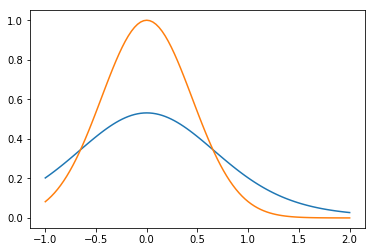

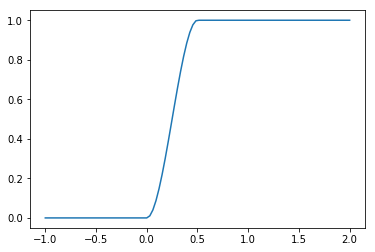

In [3]:
mu, kappa = 0.0, 2.1
x = np.linspace(-1.,2.,num=100)
z = np.exp(-x**2/.4)
von_mises = np.exp(kappa*np.cos(x-mu))/(2*np.pi*i0(kappa))
plt.plot(x,von_mises)
plt.plot(x,z)
plt.show()

plt.plot(x,smoothstep(2*x))